/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


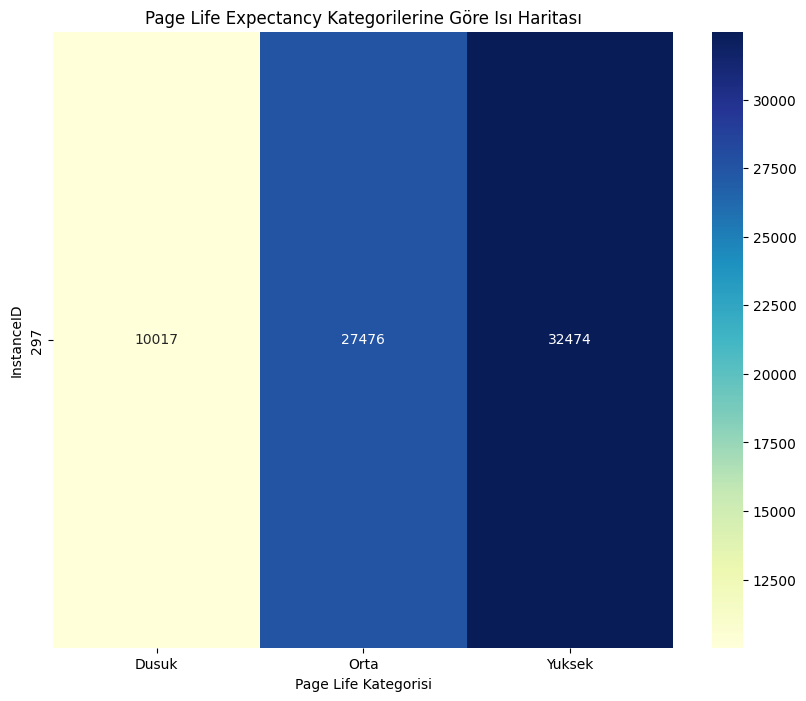

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Veri setini yükleme
df = pd.read_csv(r'/content/OYAKint.csv')




# 'page life expectancy' değerini kategorilere ayırma
def categorize_page_life_expectancy(value):
    if value < 301:
        return 'Dusuk'
    elif 301 <= value < 5000:
        return 'Orta'
    else:
        return 'Yuksek'

# Yeni bir sütun oluşturarak her bir örneği bu kategorilere göre etiketleme
df['page_life_category'] = df['page life expectancy'].apply(categorize_page_life_expectancy)

# Her bir satır için 'alışveriş sepeti' oluşturma
transactions = df.groupby(['InstanceID'])['page_life_category'].apply(list).tolist()

# Veri setini FP-Growth için uygun formata dönüştürme
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_ready_for_fp = pd.DataFrame(te_ary, columns=te.columns_)

# FP-Growth algoritmasını kullanarak sık kullanılan item setlerini bulma
frequent_itemsets = fpgrowth(df_ready_for_fp, min_support=0.1, use_colnames=True)

# Kuralları çıkarma
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
grouped = df.groupby(['InstanceID', 'page_life_category']).size().unstack(fill_value=0)

# Sonuçları yazdırma
plt.figure(figsize=(10, 8))
sns.heatmap(grouped, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Page Life Expectancy Kategorilerine Göre Isı Haritası')
plt.xlabel('Page Life Kategorisi')
plt.ylabel('InstanceID')
plt.show()


***Korelasyon Matrisi***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
veriler = pd.read_csv(r'/content/OYAKint.csv')
veriler_h = veriler.head()
print(veriler_h)
X = veriler.iloc[:,2:36].values
Y = veriler.iloc[:,2:7]
Z = veriler.iloc[:,7:36]

korelasyon_matrisi = Y.corr()

plt.figure(figsize=(10,8))
sns.heatmap(korelasyon_matrisi,annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

***Kolon Özellikleri***

In [ ]:
import pandas as pd
from scipy import stats
dosya_yolu = pd.read_csv(r'/content/OYAKint.csv')
df = dosya_yolu
df = df.iloc[:,2:8]
# İstatistiksel özetleri saklamak için boş bir DataFrame oluştur
istatistikler = pd.DataFrame(columns=['Özellik', 'Mod', 'Medyan', 'Standart Sapma', 'Ortalama', 'Minimum', 'Maksimum'])

for kolon in df.columns:
    # Mod hesaplama (birden fazlamod olabilir)
    mod = df[kolon].mode().values

    # Eğer birden fazla mod değeri varsa, bunları birleştir
    mod_str = ', '.join(map(str, mod))


    # Diğer istatistikleri hesapla
    medyan = df[kolon].median()
    standart_sapma = df[kolon].std()
    ortalama = df[kolon].mean()
    minimum = df[kolon].min()
    maksimum = df[kolon].max()

    # Hesaplanan istatistikleri DataFrame'e ekle
    istatistikler.loc[len(istatistikler)]= {'Özellik': kolon,
                                          'Mod': mod_str,
                                          'Medyan': medyan,
                                          'Standart Sapma': standart_sapma,
                                          'Ortalama': ortalama,
                                          'Minimum': minimum,
                                          'Maksimum': maksimum}

# İstatistiksel özetleri göster
print(istatistikler)

***'page life expectancy' için en çok etki eden kolonlar***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv(r'/content/OYAKint.csv')

# 'page life expectancy' kolonunu etiketleme
df['page_life_expectancy_etiket'] = df['page life expectancy'].apply(lambda x: 1 if x <= 300 else 0)

# Altıncı indeksten son indekse kadar olan sütunlar
altinci_sutundan_sonra = df.columns[6:]  # Altıncı indeksten itibaren sütun isimlerini al

# İlişkileri saklamak için boş bir DataFrame oluştur
iliskiler_df = pd.DataFrame(columns=['Sütun', '1 için Ortalama', '0 için Ortalama'])

for sutun in altinci_sutundan_sonra:
    # 1 ve 0 değerlerinin ortalamalarını hesapla
    bir_ortalama = df[df[sutun] == 1]['page_life_expectancy_etiket'].mean()
    sifir_ortalama = df[df[sutun] == 0]['page_life_expectancy_etiket'].mean()

    # Yeni verileri DataFrame'e ekle
    if not pd.isna(bir_ortalama) and bir_ortalama != 0:
        yeni_satir = pd.DataFrame({'Sütun': [sutun], '1 için Ortalama': [bir_ortalama], '0 için Ortalama': [sifir_ortalama]})
        iliskiler_df = pd.concat([iliskiler_df, yeni_satir], ignore_index=True)

# Sonuçları göster
print(iliskiler_df)

# Grafik boyutunu ayarla
plt.figure(figsize=(12, 8))

# Her bir sütun için, 1 ve 0 değerlerinin ortalamalarını bar grafik olarak çizdir
bar_genisligi = 0.35
index = range(len(iliskiler_df))

plt.bar(index, iliskiler_df['1 için Ortalama'], bar_genisligi, label='1 için Ortalama', color='blue')
plt.bar([p + bar_genisligi for p in index], iliskiler_df['0 için Ortalama'], bar_genisligi, label='0 için Ortalama', color='red')

# Grafik başlığı ve eksen etiketlerini ekle
plt.xlabel('Kolonlar')
plt.ylabel('Ortalama Etiket Değeri')
plt.title('Diğer Kolon Değerlerinin "Page Life Expectancy" Üzerindeki Etkisi')
plt.xticks([p + bar_genisligi/2 for p in index], iliskiler_df['Sütun'], rotation=90)

# Efsaneyi ekle
plt.legend()

# Grafik gösterimi
plt.tight_layout()
plt.show()


***'page life expectancy' değerine göre ısı haritası***




#Data Platform Derin Öğrenme Modeli ile Veri Tabanı Yönetim Yazılımı



In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InstanceID,CreateDate,page life expectancy,% privileged time,transactions/sec,write transactions/sec,logical connections,dbaHCDOC,VobVadesiDolmuslariSil,dbaShrinkLog,...,dbaCheckListenerStatus,SP_TblTicGunlukInsertData,tblTicTarihsel,dbaFullAylıkBackup,WMI Response - DATABASE Data File Growth Event,dbaFibabankEventLogDelete,dbaFibadataShrink,Set Mapping Job,dbaCheckDBSync,page_life_category
0,297,00:02.0,12167,10.15,254.72,166.82,638,0,0,0,...,0,0,0,0,0,0,0,0,0,Yuksek
1,297,00:18.0,12167,3.32,420.75,336.80,658,0,0,0,...,0,0,0,0,0,0,0,0,0,Yuksek
2,297,00:32.0,12167,2.54,217.77,174.81,655,0,0,0,...,0,0,0,0,0,0,0,0,0,Yuksek
3,297,00:43.0,12167,4.09,159.67,124.74,652,0,0,0,...,0,0,0,0,0,0,0,0,0,Yuksek
4,297,00:52.0,12167,3.12,411.09,190.58,652,0,0,0,...,0,0,0,0,0,0,0,0,0,Yuksek


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69967 entries, 0 to 69966
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   InstanceID                                      69967 non-null  int64  
 1   CreateDate                                      69967 non-null  object 
 2   page life expectancy                            69967 non-null  int64  
 3   % privileged time                               69967 non-null  float64
 4   transactions/sec                                69967 non-null  float64
 5   write transactions/sec                          69967 non-null  float64
 6   logical connections                             69967 non-null  int64  
 7   dbaHCDOC                                        69967 non-null  int64  
 8   VobVadesiDolmuslariSil                          69967 non-null  int64  
 9   dbaShrinkLog                           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
InstanceID,69967.0,297.000000,0.000000,297.00,297.00,297.00,297.00,297.00
page life expectancy,69967.0,6423.278374,6041.443132,0.00,1324.00,4375.00,10447.00,24110.00
% privileged time,69967.0,6.232782,3.897389,0.39,3.51,5.26,7.79,46.98
transactions/sec,69967.0,799.743985,1193.552874,4.99,244.76,421.43,727.68,12576.29
write transactions/sec,69967.0,264.981632,212.895878,0.00,123.80,194.84,343.82,2348.42
logical connections,69967.0,655.545714,114.495493,341.00,563.00,626.00,775.00,978.00
dbaHCDOC,69967.0,0.008375,0.091134,0.00,0.00,0.00,0.00,1.00
VobVadesiDolmuslariSil,69967.0,0.000029,0.005346,0.00,0.00,0.00,0.00,1.00
dbaShrinkLog,69967.0,0.000029,0.005346,0.00,0.00,0.00,0.00,1.00
dbaHCDOCexportTxt,69967.0,0.001258,0.035443,0.00,0.00,0.00,0.00,1.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe(include=object).T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,unique,top,freq
CreateDate,69967,1996,17:42.0,143
page_life_category,69967,3,Yuksek,32474


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


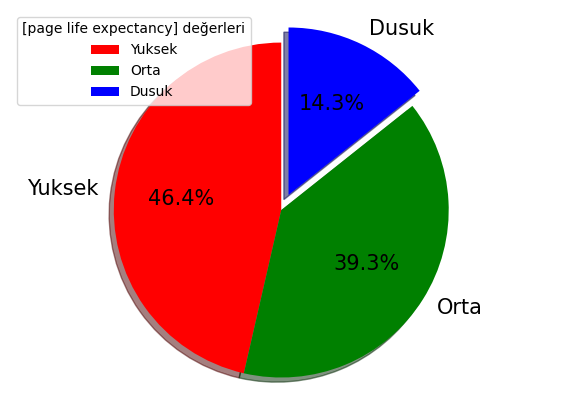

In [ ]:
# Kategori frekanslarını hesaplama
labels = df['page_life_category'].value_counts()
w = (list(labels.index), list(labels.values))

# Pasta grafiği için explode ayarları
explode = [0, 0, 0.1]  # Yüksek kategorisini biraz öne çıkar

# Pasta grafiği çizme
fig = plt.figure(figsize=(7, 5))
plt.pie(w[1], explode=explode, labels=w[0], shadow=True, startangle=90,
        colors=['red', 'green', 'blue'], autopct='%1.1f%%', textprops={'fontsize': 15})
plt.axis('equal')  # Bu sayede pasta grafiği yuvarlak görünür
plt.legend(title='[page life expectancy] değerleri', loc='upper left')
plt.show()

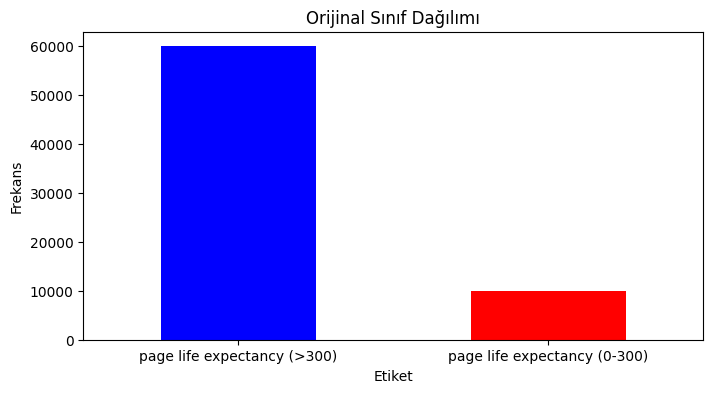

Orijinal Veri Seti Bilgileri:
Toplam veri sayısı: 69967
Sınıf dağılımı:
 etiket
0    59950
1    10017
Name: count, dtype: int64

Oversampling Yapıldıktan Sonra:
Toplam veri sayısı: 119900
Sınıf dağılımı:
 etiket
0    59950
1    59950
Name: count, dtype: int64


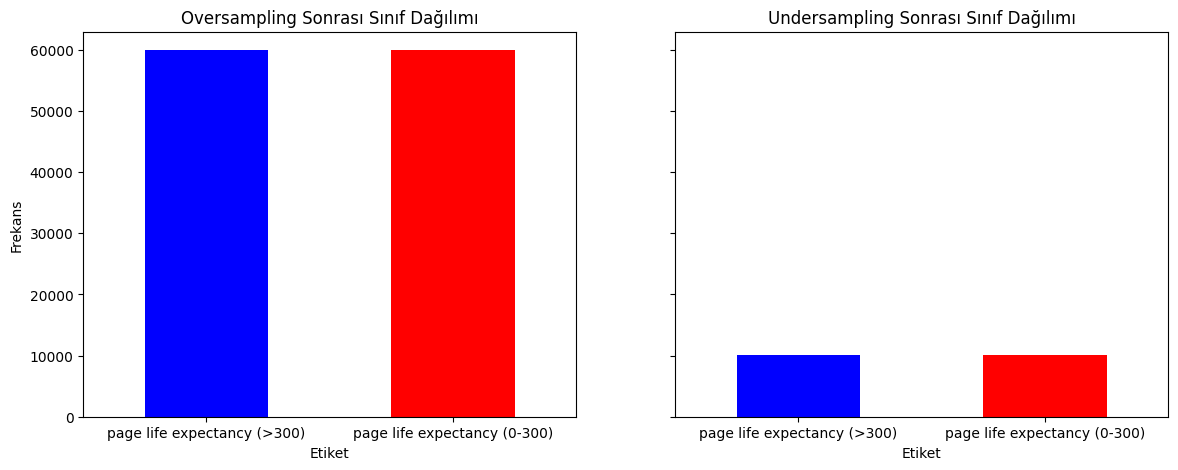


Undersampling Yapıldıktan Sonra:
Toplam veri sayısı: 20034
Sınıf dağılımı:
 etiket
0    10017
1    10017
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Veri setini yükle
df = pd.read_csv(r'/content/OYAKint.csv')

# 'page life expectancy' kolonunu etiketleme
df['etiket'] = df['page life expectancy'].apply(lambda x: 1 if x <= 300 else 0)

# Orijinal sınıf dağılımını görselleştirme
plt.figure(figsize=(8, 4))
df['etiket'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Orijinal Sınıf Dağılımı')
plt.xlabel('Etiket')
plt.ylabel('Frekans')
plt.xticks([0, 1], ['page life expectancy (>300)', 'page life expectancy (0-300)'], rotation=0)
plt.show()
print("Orijinal Veri Seti Bilgileri:")
print("Toplam veri sayısı:", len(df))
print("Sınıf dağılımı:\n", df['etiket'].value_counts())
# Azınlık ve çoğunluk sınıflarını ayır
df_majority = df[df['etiket'] == 0]
df_minority = df[df['etiket'] == 1]

# Azınlık sınıfını çoğaltma (Oversampling)
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Çoğunluk sınıfını azaltma (Undersampling)
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Güncellenmiş sınıf dağılımlarını yazdır ve görselleştir
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
df_upsampled['etiket'].value_counts().plot(kind='bar', ax=ax[0], color=['blue', 'red'])
ax[0].set_title('Oversampling Sonrası Sınıf Dağılımı')
ax[0].set_xlabel('Etiket')
ax[0].set_ylabel('Frekans')
ax[0].set_xticklabels(['page life expectancy (>300)', 'page life expectancy (0-300)'], rotation=0)
print("\nOversampling Yapıldıktan Sonra:")
print("Toplam veri sayısı:", len(df_upsampled))
print("Sınıf dağılımı:\n", df_upsampled['etiket'].value_counts())


df_downsampled['etiket'].value_counts().plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Undersampling Sonrası Sınıf Dağılımı')
ax[1].set_xticklabels(['page life expectancy (>300)', 'page life expectancy (0-300)'], rotation=0)
ax[1].set_ylabel('Frekans')
ax[1].set_xlabel('Etiket')
plt.show()
print("\nUndersampling Yapıldıktan Sonra:")
print("Toplam veri sayısı:", len(df_downsampled))
print("Sınıf dağılımı:\n", df_downsampled['etiket'].value_counts())


## KNN

In [ ]:
df['etiket'] = df['page life expectancy'].apply(lambda x:1 if x<300 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['etiket'].describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    69967.000000
mean         0.143010
std          0.350086
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: etiket, dtype: float64

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score
from sklearn.utils import resample

df = pd.read_csv(r'/content/OYAKint.csv')
df['etiket'] = df['page life expectancy'].apply(lambda x: 1 if x <= 300 else 0)

label_counts = df['etiket'].value_counts()
df_majority = df[df['etiket'] == label_counts.idxmax()]
df_minority = df[df['etiket'] == label_counts.idxmin()]
df_majority = df[df['etiket'] == label_counts.idxmax()]
df_minority = df[df['etiket'] == label_counts.idxmin()]
df_sifira_gore = resample(df_majority,
                                   replace=False,
                                   n_samples=label_counts.min(),  # azınlık sınıfının büyüklüğüne eşitlenir
                                   random_state=42)
df_sifira_gore = pd.concat([df_sifira_gore, df_minority])
X = df_sifira_gore.iloc[:, 2:]  # 2 ila 6 arasındaki sütunlar
y = df_sifira_gore['page life expectancy'] > 300  # Hedef etiket
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
knn = KNeighborsClassifier(n_neighbors=3)  # K değeri
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model performansını değerlendir
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



print(classification_report(y_pred,y_test))
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

       False       1.00      0.99      0.99      1990
        True       0.99      1.00      0.99      2017

    accuracy                           0.99      4007
   macro avg       0.99      0.99      0.99      4007
weighted avg       0.99      0.99      0.99      4007

Confusion Matrix:
 [[1967    2]
 [  23 2015]]
Accuracy: 0.9937609183928126
F1 Score: 0.9938347718865599
Recall: 0.9887144259077527


Confusion Matrix:
 [[ 2001     0]
 [    0 11993]]
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2001
        True       1.00      1.00      1.00     11993

    accuracy                           1.00     13994
   macro avg       1.00      1.00      1.00     13994
weighted avg       1.00      1.00      1.00     13994



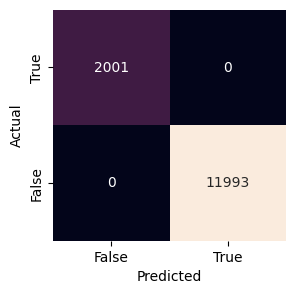

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score
df = pd.read_csv(r'/content/OYAKint.csv')
X = df.iloc[:, 2:7]  # 2 ila 6 arasındaki sütunlar
y = df['page life expectancy'] > 300  # Hedef etiket

# Veriyi eğitim ve test kümelerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modelini oluştur

svm_model = SVC(kernel='linear')  # Lineer çekirdek
svm_model.fit(X_train, y_train)

# Test verilerini tahmin et
y_pred = svm_model.predict(X_test)

# Model performansını değerlendir
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = ['True','False'], columns = ['False','True'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_pred,y_test))

Confusion Matrix:
 [[   0 1741  260]
 [   0 4222 1260]
 [   0    0 6511]]
Accuracy: 0.7669715592396742
F1 Score: 0.7669715592396742
Recall: 0.7669715592396742
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.77      0.71      0.74      5963
           2       1.00      0.81      0.90      8031

    accuracy                           0.77     13994
   macro avg       0.59      0.51      0.54     13994
weighted avg       0.90      0.77      0.83     13994



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


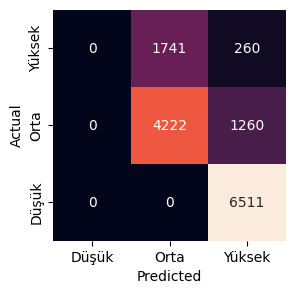

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Veri setini yükleme
df = pd.read_csv(r'/content/OYAKint.csv')

# İlk iki sütunu atma

def categorize_page_life_expectancy(value):
    if value < 301:
        return 'Dusuk'
    elif 301 <= value < 5000:
        return 'Orta'
    else:
        return 'Yuksek'

# Yeni bir sütun oluşturarak her bir örneği bu kategorilere göre etiketleme
df['page_life_category'] = df['page life expectancy'].apply(categorize_page_life_expectancy)

# Her bir satır için 'alışveriş sepeti' oluşturma
transactions = df.groupby(['InstanceID'])['page_life_category'].apply(list).tolist()
df.drop(columns=['InstanceID', 'CreateDate'], inplace=True)
# Kategorik değişkenleri sayısallaştırma
label_encoder = LabelEncoder()
df['page_life_category'] = label_encoder.fit_transform(df['page_life_category'])

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = df.drop('page_life_category', axis=1)
y = df['page_life_category']

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(n_estimators=25, max_depth = 1,random_state=42)
rf_model.fit(X_train, y_train)

# Modelin test verileri üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin başarısını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')  # 'macro' olarak ayarla
f1 = f1_score(y_test, y_pred, average='micro')  # 'macro' olarak ayarla
conf_matrix = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = ['Yüksek','Orta','Düşük'], columns = ['Düşük','Orta','Yüksek'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_pred,y_test))


In [ ]:
home_data = pd.read_csv('xfirma2.csv', usecols = ['% privileged time', 'transactions/sec', 'page life expectancy'])
sns.scatterplot(data = home_data, x = 'transactions/sec', y = '% privileged time', hue = 'page life expectancy')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(home_data[['% privileged time', 'transactions/sec']], home_data[['page life expectancy']], test_size=0.33, random_state=0)
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)
sns.scatterplot(data = X_train, x = 'transactions/sec', y = '% privileged time', hue = kmeans.labels_)
***********************************************************************
import pandas as pd
import seaborn as sns
home_data = pd.read_csv('xfirma2.csv', usecols = ['logical connections', 'dbaMaintenanceReIndex', 'page life expectancy'])
sns.scatterplot(data = home_data, x = 'dbaMaintenanceReIndex', y = 'logical connections', hue = 'page life expectancy')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(home_data[['logical connections', 'dbaMaintenanceReIndex']], home_data[['page life expectancy']], test_size=0.33, random_state=0)
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)
sns.scatterplot(data = X_train, x = 'dbaMaintenanceReIndex', y = 'logical connections', hue = kmeans.labels_)
sns.boxplot(x = kmeans.labels_, y = y_train['page life expectancy'])


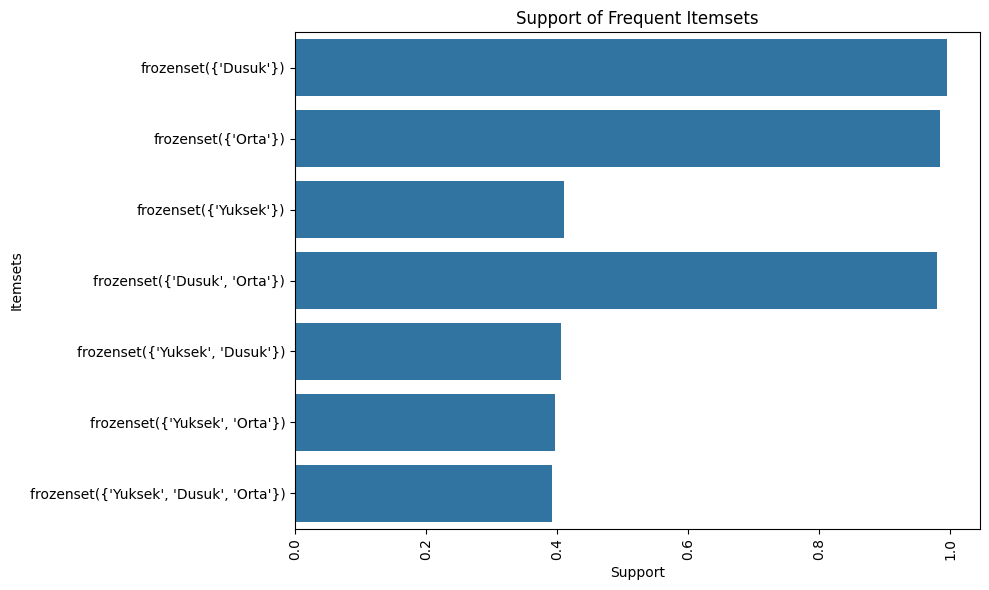

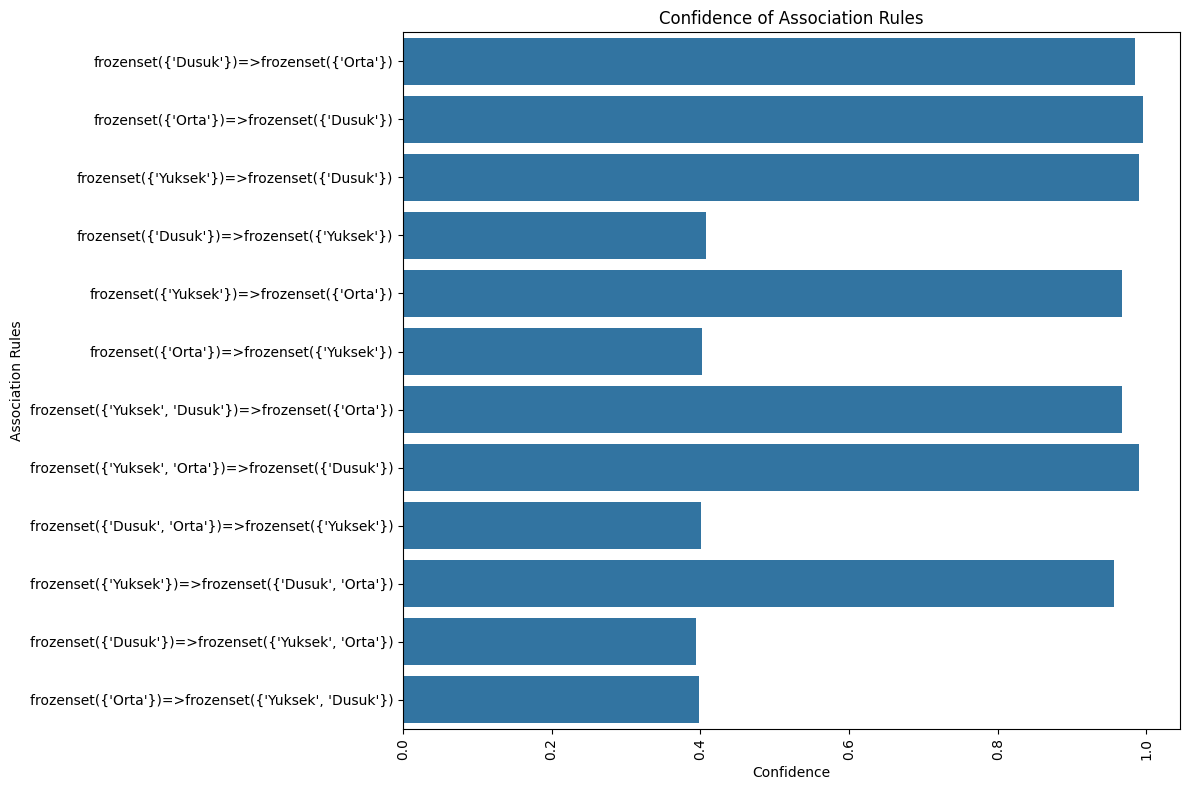

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme
df = pd.read_csv(r'/content/OYAKint.csv')

# Sayısal değerleri kategorilere ayırma
categories = {
    'page life expectancy': [('Yuksek', 0, 300), ('Orta', 300, 5000), ('Dusuk', 5000, 50000)],
    '% privileged time': [('Dusuk', 0, 15), ('Orta', 15, 25), ('Yuksek', 25, 50)],
    'transactions/sec': [('Dusuk', 0, 300), ('Orta', 300, 5000), ('Yuksek', 5000, 20000)],
    'write transactions/sec': [('Dusuk', 0, 500), ('Orta', 500, 1500), ('Yuksek', 1500, 5000)],
    'logical connections': [('Dusuk', 0, 500), ('Orta', 500, 750), ('Yuksek', 750, 2000)]
}

for column, bins in categories.items():
    bin_edges = [b[1] for b in bins] + [float('inf')]
    labels = [b[0] for b in bins]
    df[column] = pd.cut(df[column], bins=bin_edges, labels=labels, right=False)

# İşlemleri oluşturma (her satır bir işlem)
transactions = df[list(categories.keys())].apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# FP-Growth için uygun formata dönüştürme
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_ready_for_fp = pd.DataFrame(te_ary, columns=te.columns_)

# FP-Growth algoritmasını kullanarak sık kullanılan item setlerini bulma
frequent_itemsets = fpgrowth(df_ready_for_fp, min_support=0.05, use_colnames=True)

# Kuralları çıkarma
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sık kullanılan öğe setlerinin destek değerlerini görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=frequent_itemsets, x='support', y=frequent_itemsets['itemsets'].astype(str))
plt.title('Support of Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# İlişkilendirme kurallarının güven değerlerini görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(data=rules, x='confidence', y=rules['antecedents'].astype(str) + '=>' + rules['consequents'].astype(str))
plt.title('Confidence of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Association Rules')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

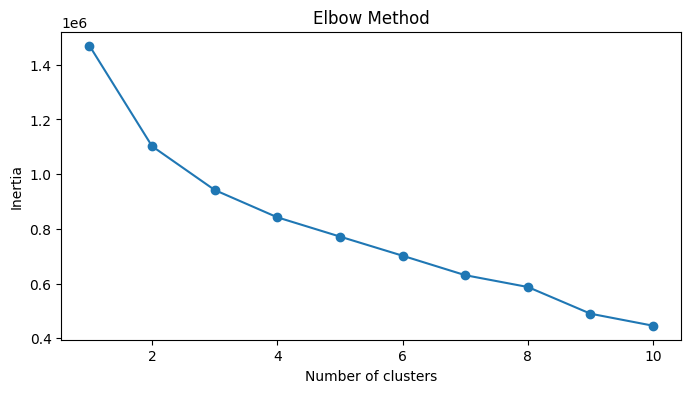

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'y_test' is not defined

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Veri setini yükleme
df = pd.read_csv(r'/content/OYAKint.csv')

# İlk iki sütunu atma

def categorize_page_life_expectancy(value):
    if value < 301:
        return 'Dusuk'
    elif 301 <= value < 5000:
        return 'Orta'
    else:
        return 'Yuksek'

# Yeni bir sütun oluşturarak her bir örneği bu kategorilere göre etiketleme
df['page_life_category'] = df['page life expectancy'].apply(categorize_page_life_expectancy)

# Her bir satır için 'alışveriş sepeti' oluşturma
transactions = df.groupby(['InstanceID'])['page_life_category'].apply(list).tolist()
df.drop(columns=['InstanceID', 'CreateDate'], inplace=True)
# Kategorik değişkenleri sayısallaştırma
label_encoder = LabelEncoder()
df['page_life_category'] = label_encoder.fit_transform(df['page_life_category'])
# Kategorik verileri sayısallaştırma
label_encoder = LabelEncoder()
df['page_life_category'] = label_encoder.fit_transform(df['page_life_category'])

# Tüm verileri ölçeklendirme
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Elbow metodu ile optimal küme sayısını belirleme
inertia = []
for i in range(1, 11):  # 1'den 10'a kadar küme sayısı deniyoruz
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiğini çizdirme
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Optimal küme sayısıyla modeli eğitme
k = 3  # Örnek olarak 3 kümeyi seçiyoruz, grafiğe bakarak karar verebilirsiniz
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Sonuçları kaydetme
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')  # 'macro' olarak ayarla
f1 = f1_score(y_test, y_pred, average='micro')  # 'macro' olarak ayarla
conf_matrix = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = ['Yüksek','Orta','Düşük'], columns = ['Düşük','Orta','Yüksek'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_pred,y_test))

df.to_csv('content/clustered_data.csv', index=False)
print("Kümeleme tamamlandı ve 'clustered_data.csv' olarak kaydedildi.")


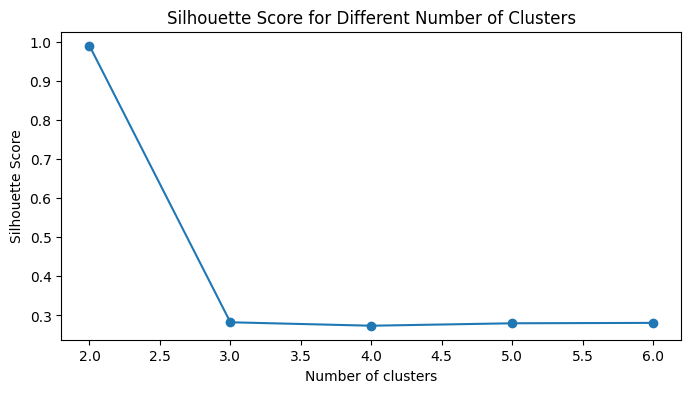

Kümeleme tamamlandı ve 'clustered_data.csv' olarak kaydedildi.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

# Veri setini yükleme
df = pd.read_csv(r'/content/OYAKint.csv')
def categorize_page_life_expectancy(value):
    if value < 301:
        return 'Dusuk'
    elif 301 <= value < 5000:
        return 'Orta'
    else:
        return 'Yuksek'

# Yeni bir sütun oluşturarak her bir örneği bu kategorilere göre etiketleme
df['page_life_category'] = df['page life expectancy'].apply(categorize_page_life_expectancy)

# Her bir satır için 'alışveriş sepeti' oluşturma
transactions = df.groupby(['InstanceID'])['page_life_category'].apply(list).tolist()
# İlk iki sütunu atma
df.drop(columns=['InstanceID', 'CreateDate'], inplace=True)

# Kategorik verileri sayısallaştırma
label_encoder = LabelEncoder()
df['page_life_category'] = label_encoder.fit_transform(df['page_life_category'])

# Tüm verileri ölçeklendirme
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# KMeans modelini 3 küme ile oluşturma ve eğitme
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Silhouette skorlarını çizdirme
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Sonuçları kaydetme
df.to_csv('clustered_data.csv', index=False)
print("Kümeleme tamamlandı ve 'clustered_data.csv' olarak kaydedildi.")
